In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Import the data set
london = pd.read_csv('LFB 2020 Incident data.csv',
    infer_datetime_format=True, )

In [3]:
london.head()

,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,314496,000367-01012020,2020/1/1,2020,3:46:03 PM,15,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),On land associated with building,SE12 8RN,SE12,1.000232e+11,22005070.0,E09000023,LEWISHAM,Lewisham,E05000447,LEE GREEN,LEE GREEN,539906.0,174909.0,539950.0,174950.0,51.455887,0.012303,London,Lee Green,63.0,Lee Green,NaN,NaN,1.0,1.0,1.0,1.0,339.0
1,314497,000239-01012020,2020/1/1,2020,9:13:47 AM,9,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,E5,0.000000e+00,20900713.0,E09000012,HACKNEY,Hackney,E05009383,SPRINGFIELD,SPRINGFIELD,NaN,NaN,534950.0,187250.0,NaN,NaN,London,Stoke Newington,339.0,Stoke Newington,355.0,Stoke Newington,1.0,2.0,2.0,1.0,339.0
2,314498,000455-01012020,2020/1/1,2020,7:56:38 PM,19,False Alarm,AFA,NaN,Non Residential,Cinema,Within same building,N9 0AR,N9,2.071906e+08,20703519.0,E09000010,ENFIELD,Enfield,E05000203,JUBILEE,JUBILEE,535930.0,194537.0,535950.0,194550.0,51.633229,-0.037316,London,Edmonton,277.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,339.0
3,314499,000105-01012020,2020/1/1,2020,1:35:32 AM,1,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM9,0.000000e+00,19900235.0,E09000002,BARKING AND DAGENHAM,Barking And dagenham,E05000027,ALIBON,ALIBON,NaN,NaN,548850.0,185150.0,NaN,NaN,London,Dagenham,339.0,Dagenham,379.0,Dagenham,1.0,2.0,2.0,4.0,1356.0
4,314500,000038-01012020,2020/1/1,2020,12:27:52 AM,0,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,N8,0.000000e+00,21106607.0,E09000014,HARINGEY,Haringey,E05000273,HORNSEY,HORNSEY,NaN,NaN,530450.0,189550.0,NaN,NaN,London,Hornsey,211.0,Hornsey,260.0,Hornsey,1.0,2.0,2.0,1.0,339.0


In [4]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98568 entries, 0 to 98567
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              98568 non-null  int64  
 1   IncidentNumber                          98568 non-null  object 
 2   DateOfCall                              98568 non-null  object 
 3   CalYear                                 98568 non-null  int64  
 4   TimeOfCall                              98568 non-null  object 
 5   HourOfCall                              98568 non-null  int64  
 6   IncidentGroup                           98568 non-null  object 
 7   StopCodeDescription                     98568 non-null  object 
 8   SpecialServiceType                      30967 non-null  object 
 9   PropertyCategory                        98568 non-null  object 
 10  PropertyType                            98568 non-null  ob

In [5]:
london.describe()

,Unnamed: 0,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
count,98568.000000,98568.0,98568.000000,9.856800e+04,9.856800e+04,44691.000000,44691.000000,98568.000000,98568.000000,44691.000000,44691.000000,93525.000000,39465.000000,97900.000000,97900.000000,98075.000000,98049.000000,98049.000000
mean,363779.500000,2020.0,13.552461,2.074889e+10,2.045208e+07,530512.332796,180281.606453,530675.225225,180496.562779,51.373791,-0.120381,301.126554,373.915165,1.402778,1.602237,1.655376,1.368816,471.305633
std,28454.275004,0.0,6.215555,4.582596e+10,4.440059e+06,10588.054392,7647.692825,9810.599816,7507.709117,2.610326,0.152499,124.036374,140.897435,0.767231,0.930872,1.416479,4.616786,1589.662817
min,314496.000000,2020.0,0.000000,0.000000e+00,4.200740e+06,503598.000000,155998.000000,503550.000000,155950.000000,0.000000,-0.509908,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,339.000000
25%,339137.750000,2020.0,10.000000,0.000000e+00,2.040139e+07,524548.000000,175596.000000,525150.000000,175950.000000,51.464155,-0.206713,224.000000,285.000000,1.000000,1.000000,1.000000,1.000000,346.000000
50%,363779.500000,2020.0,14.000000,0.000000e+00,2.120145e+07,530877.000000,180935.000000,531050.000000,181050.000000,51.512494,-0.115683,285.000000,351.000000,1.000000,1.000000,1.000000,1.000000,346.000000
75%,388421.250000,2020.0,19.000000,1.001403e+10,2.210094e+07,537098.500000,185191.000000,536450.000000,185350.000000,51.550150,-0.024463,358.000000,436.000000,2.000000,2.000000,2.000000,1.000000,346.000000
max,413063.000000,2020.0,23.000000,2.000044e+11,9.999042e+07,560187.000000,200541.000000,560150.000000,200550.000000,51.688694,0.309261,1199.000000,1200.000000,11.000000,14.000000,148.000000,665.000000,230090.000000


In [6]:
london['First_response_mins']= london['FirstPumpArriving_AttendanceTime']/60
london['Second_response_mins']= london['SecondPumpArriving_AttendanceTime']/60
london['month'] = pd.to_datetime(london['DateOfCall']).dt.month

In [7]:
london['First_response_mins']

0        1.050000
1        5.650000
2        4.616667
3        5.650000
4        3.516667
           ...   
98563    2.366667
98564    4.483333
98565    2.466667
98566    8.583333
98567    7.116667
Name: First_response_mins, Length: 98568, dtype: float64

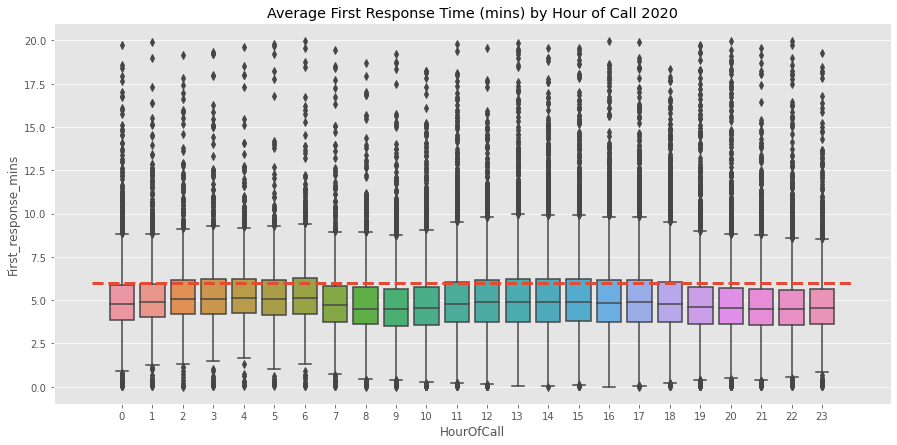

In [8]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Hour of Call 2020')
sns.boxplot(data=london,x='HourOfCall', y='First_response_mins')
plt.plot([-1,24],[6, 6], linewidth=3,linestyle='dashed', )

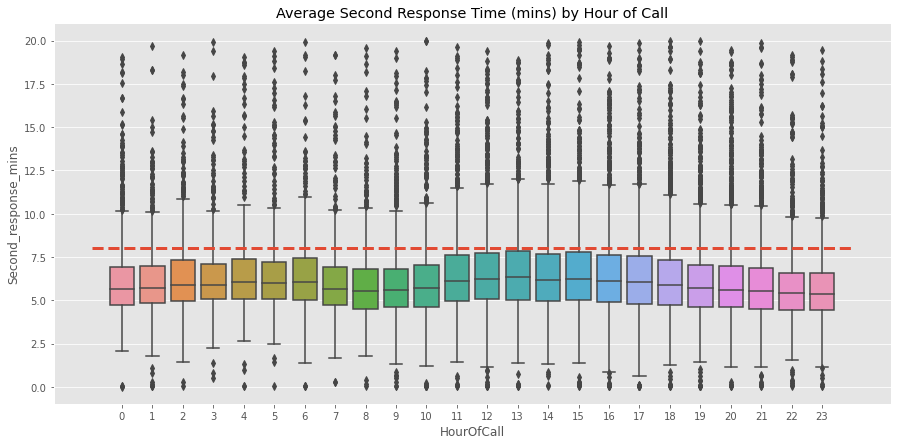

In [9]:
plt.figure(figsize=[15,7],)
plt.title('Average Second Response Time (mins) by Hour of Call')
sns.boxplot(data=london,x='HourOfCall', y='Second_response_mins')
plt.plot([-1,24],[8, 8], linewidth=3,linestyle='dashed', )


<AxesSubplot:title={'center':'Calls by Incident Type'}, ylabel='StopCodeDescription'>

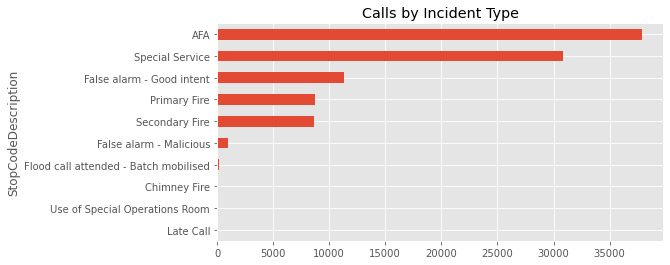

In [10]:
london.groupby(['StopCodeDescription']).size().sort_values().plot(kind='barh', figsize=[8,4], title='Calls by Incident Type')


<AxesSubplot:title={'center':'Average First Response Time (mins) by Incident Type'}, xlabel='First_response_mins', ylabel='StopCodeDescription'>

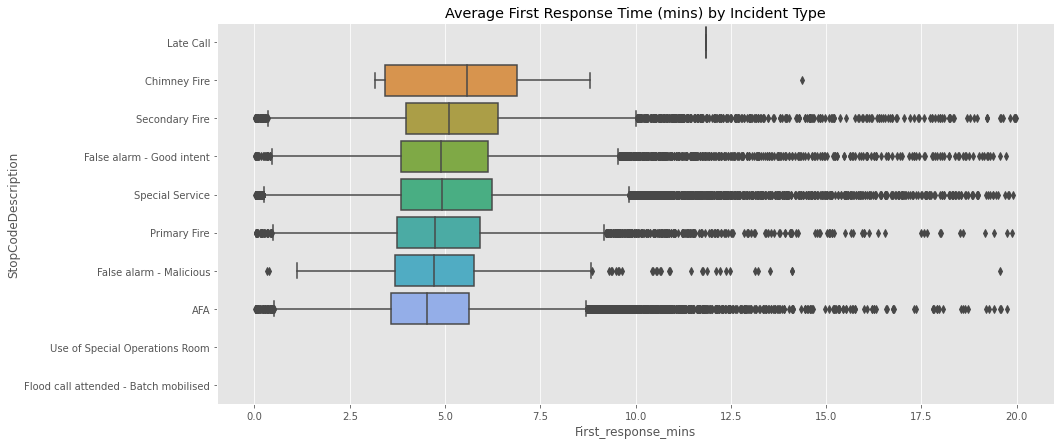

In [11]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Incident Type')

ranks = london.groupby("StopCodeDescription")["First_response_mins"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(data=london, y='StopCodeDescription', x='First_response_mins', orient='h', order=ranks)

<AxesSubplot:title={'center':'Average First Response Time (mins) by Incident Type 2020'}, xlabel='First_response_mins', ylabel='PropertyCategory'>

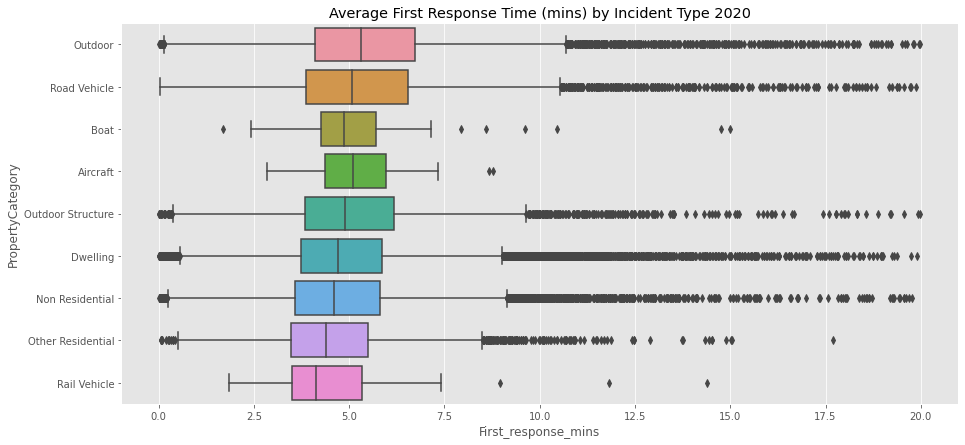

In [12]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Incident Type 2020')

ranks = london.groupby("PropertyCategory")["First_response_mins"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(data=london, y='PropertyCategory', x='First_response_mins', orient='h', order=ranks)

<AxesSubplot:ylabel='IncGeo_BoroughName'>

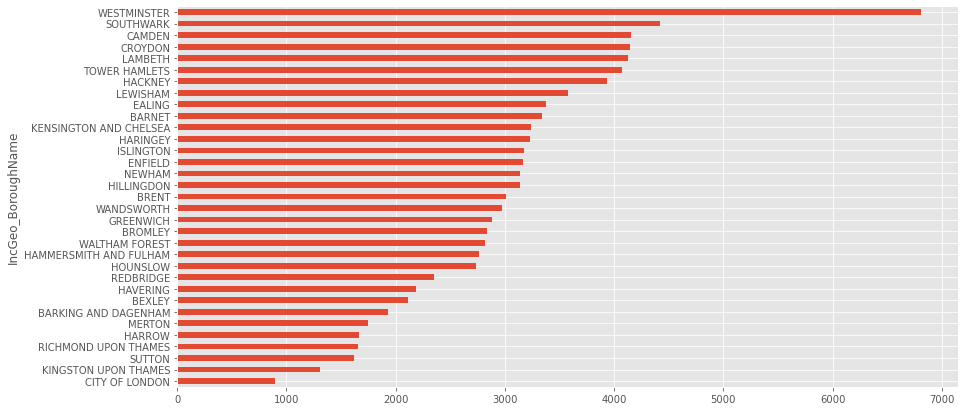

In [13]:
london.groupby(['IncGeo_BoroughName']).size().sort_values().plot(kind='barh', figsize= (14,7))

<AxesSubplot:title={'center':'Average First Response Time (mins) by Borough 2020'}, xlabel='First_response_mins', ylabel='IncGeo_BoroughName'>

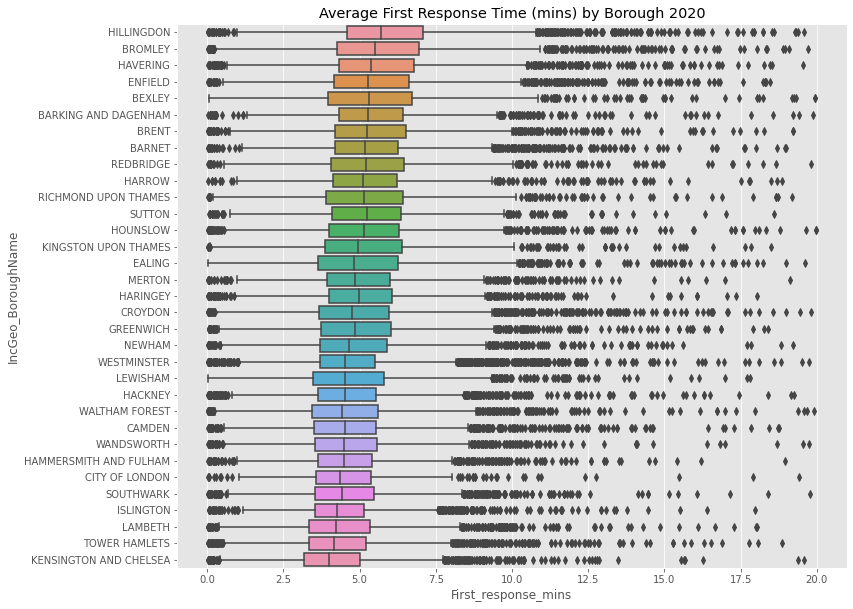

In [14]:
plt.figure(
    figsize=[12, 10], )
plt.title('Average First Response Time (mins) by Borough 2020')

ranks = london.groupby(["IncGeo_BoroughName" ])["First_response_mins"].mean().sort_values()[::-1].index
sns.boxplot(
    data=london,
    y='IncGeo_BoroughName',
    x='First_response_mins',
    orient='h',
    order=ranks,)